# CDS: Numerical Methods Assignments

- See lecture notes and documentation on Brightspace for Python and Jupyter basics. If you are stuck, try to google or get in touch via Discord.

- Solutions must be submitted via the Jupyter Hub.

- Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".

## Submission

1. Name all team members in the the cell below
2. make sure everything runs as expected
3. **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart)
4. **run all cells** (in the menubar, select Cell$\rightarrow$Run All)
5. Check all outputs (Out[\*]) for errors and **resolve them if necessary**
6. submit your solutions  **in time (before the deadline)**

## Linear Equation Systems

In the following you will implement the Gauss-Seidel (GS), Steepest Descent (SD) and the Conjugate Gradient (CG) algorithms to solve linear equation systems of the form 

$$A \mathbf{x} = \mathbf{b},$$ 

with $A$ being an $n \times n$ matrix.

In [1]:
import numpy as np
import numpy.linalg as linalg
from matplotlib import pyplot as plt
import time

### Task 1
First, you need to implement a Python function $\text{diff(a,b)}$, which returns the difference $\text{d}$ between two $n$-dimensional vectors $\text{a}$ and $\text{b}$ according to 

$$ d = || \mathbf{a} - \mathbf{b}||_\infty = \underset{i=1,2,\dots,n}{\operatorname{max}} |a_i - b_i|. $$

In [2]:
def diff(a, b):
    return np.max(np.abs(a - b))

### Task 2 

The Gauss-Seidel iteration scheme to solve the linear equation system 

$$A \mathbf{x} = \mathbf{b}$$

is defined by 

$$x_i^{(k)} = \frac{1}{a_{ii}} \left[ -\sum_{j=0}^{i-1} a_{ij} x_j^{(k)} -\sum_{j=i+1}^{n-1} a_{ij} x_j^{(k-1)} + b_i \right].$$

Note especially the difference in the sums: the first one involves $x_j^{(k)}$ and the second one $x_j^{(k-1)}$.


Give the outline of the derivation in LaTeX math notation in the markdown cell below. (Double click on "YOUR ANSWER HERE" to open the cell, and ctrl+enter to compile.) 

Hint: Similar to the Jacobi scheme, start by seperating the matrix $A$ into its diagonal ($D$), lower triangular ($L$) and upper triangular ($U$) forms, such that $A = D - L - U$.

---

We start from our linear equations:

$$Ax = b$$

We separate A into different components (diagonal, strictly lower triangular and strictly upper triangular):

$$A = D - L - U$$


We write $D - L$ as $L'$ to get:


$$(L' - U)x = b$$


We take the iterative process of the Gauss-Seidel method to write:


$$
L'x^k = b + Ux^{k-1}\\
x^k = L'^{-1}(b + Ux^{k-1})\\
$$
If we write every component of the matrix $A$ as $a_{ij}$, we can use forward substitution to rewrite our previous equation to:


$$x^k _i = \frac{1}{a_{ii}}\left[-\sum_{j=0}^{i-1}a_{ij}x_{j}^{k} -\sum_{j=i+1}^{n-1}a_{ij}x_{j}^{k-1} + b_i\right].$$

### Task 3

Implement the Gauss-Seidel iteration scheme derived above

$$x_i^{(k)} = \frac{1}{a_{ii}} \left[ -\sum_{j=0}^{i-1} a_{ij} x_j^{(k)} -\sum_{j=i+1}^{n-1} a_{ij} x_j^{(k-1)} + b_i \right],$$

where $a_{ij}$ are the elements of the matrix $A$, and $x_i$ and $b_i$ the elements of vectors $\mathbf{x}$ and $\mathbf{b}$, respectively.

Write a Python function $\text{GS(A, b, eps)}$, where $\text{A}$ represents the $n \times n$ $A$ matrix, $\text{b}$ represents the $n$-dimensional solution vector $\mathbf{b}$, and $\text{eps}$ is a scalar $\varepsilon$ defining the accuracy up to which the iteration is performed. Your function should return both the solution vector $\mathbf{x}^{(k)}$ from the last iteration step and the corresponding iteration index $k$. 

Use an assertion to make sure the diagonal elements of $A$ are all non-zero. Initialize your iteration with $\mathbf{x}^{(0)} = \mathbf{0}$ (or with $\mathbf{x}^{(1)} = D^{-1}\mathbf{b}$, with $D$ the diagonal of $A$) and increase $k$ until $|| \mathbf{x}^{(k)} - \mathbf{x}^{(k-1)}||_\infty < \varepsilon$. 

In [3]:
def GS(A, b, eps, k_max = 1000000):
    """
    Return the Gauss-Seidel algorithm estimate solution x to the problem
    Ax = b and the number of iterations k it took to decrease maximum
    norm error below eps or to exceed iteration maximum k_max.
    """
    
    # Assert n by n matrix.
    assert len(A.shape) == 2 and A.shape[0] == A.shape[1]
    n = len(A)
    
    # First we decompose A = D - L - U.
    D = np.diag(np.diag(A))
    U = -np.triu(A) + D
    L = -np.tril(A) + D
    
    # We need non-zero diagonals elements.
    assert np.all(np.diag(D) != 0)
    
    x_prev = np.zeros(n)
    x_cur  = np.dot(linalg.inv(D), b)
    
    k = 1
    while diff(x_cur, x_prev) > eps and k < k_max:
        k += 1
        # We will have to copy, as the array elements will point to the same
        # memory otherwise, and changes to one array will change the other aswell.
        x_prev = x_cur.copy()
        for i in range(n):
            x_cur[i] = 1/A[i, i]*(-np.dot(A[i, :i], x_cur[:i]) - np.dot(A[i, i + 1:], x_prev[i + 1:]) + b[i])
    return x_cur, k

### Task 4

Verify your implementation by comparing your approximate result to an exact solution. Use $\text{numpy.linalg.solve()}$ to obtain the exact solution of the system

$$
\begin{align*}
    \begin{pmatrix}
        10 & -1 & 2 & 0 \\ 
        -1 & 11 &-1 & 3 \\
         2 & -1 & 10&-1 \\
         0 &  3 & -1& 8
    \end{pmatrix} \mathbf{x}^*
    =
    \begin{pmatrix}
    6 \\
    25 \\
    -11\\
    15
    \end{pmatrix}
\end{align*}
$$

Then compare you approximate result $\mathbf{\tilde{x}}$ to the exact result $\mathbf{x^*}$ by plotting $|| \mathbf{x}^* - \mathbf{\tilde{x}}||_\infty$ for different accuracies $\varepsilon = 10^{-1}, 10^{-2}, 10^{-3}, 10^{-4}$. 

Implement a unit test for your function using this system.

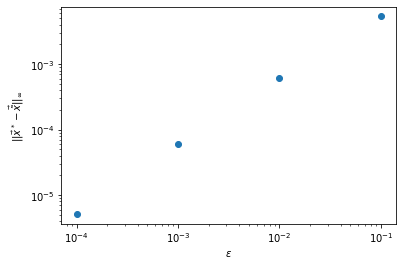

In [4]:
A = np.array([[ 10, - 1,   2,   0],
              [- 1,  11, - 1,   3],
              [  2, - 1,  10, - 1],
              [  0,   3, - 1,   8]])
b = np.array( [  6,  25, -11,  15] )
x_exact = linalg.solve(A, b)

eps_list  = [1e-1, 1e-2, 1e-3, 1e-4]
diff_list = []
for eps in eps_list:
    x, k = GS(A, b, eps)
    diff_list.append(diff(x_exact, x))

fig, ax = plt.subplots()

ax.scatter(eps_list, diff_list)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("$\epsilon$")
ax.set_ylabel("$||\\vec{x}^* - \\vec{\\tilde{x}}||_\infty$")

fig.show()

In [5]:
# As the three algorithm functions will have the same signature,
# it makes sense to only write the test function once.

def test_alg(alg, alg_name):
    """
    Check that function alg returns solutions for the example system Ax = b
    within the error defined by the same eps as used for the iteration.
    """
    
    A = np.array([[ 10, - 1,   2,   0],
                  [- 1,  11, - 1,   3],
                  [  2, - 1,  10, - 1],
                  [  0,   3, - 1,   8]])
    b = np.array( [  6,  25, -11,  15] )
    x_exact = linalg.solve(A, b)

    print("Starting with A =")
    print(A)
    print("and b =", b)
    print("We apply the {} algorithm to solve Ax = b.".format(alg_name))
    print()

    eps_list = [1e-1, 1e-2, 1e-3, 1e-4]
    for eps in eps_list:
        x, k = alg(A, b, eps)
        print("For eps = {:.0e}\tafter k = {:d}\t iterations:".format(eps, k))
        print("x =\t\t\t", x)
        print("Ax =\t\t\t", np.dot(A, x))
        print("diff(Ax, b) =\t\t", diff(A @ x, b))
        print("diff(x, x_exact) =\t", diff(x, x_exact))
        print()
        
        assert diff(x, x_exact) < eps
    

In [6]:
def test_GS():
    """
    Check that GS returns solutions for the example system Ax = b
    within the error defined by the same eps as used for the iteration.
    """
    
    return test_alg(GS, "Gauss-Seidel")
    
test_GS()

Starting with A =
[[10 -1  2  0]
 [-1 11 -1  3]
 [ 2 -1 10 -1]
 [ 0  3 -1  8]]
and b = [  6  25 -11  15]
We apply the Gauss-Seidel algorithm to solve Ax = b.

For eps = 1e-01	after k = 4	 iterations:
x =			 [ 0.99463393  1.99776509 -0.99803257  1.00108402]
Ax =			 [  5.95250909  24.98206671 -10.98990699  15.        ]
diff(Ax, b) =		 0.04749090616931895
diff(x, x_exact) =	 0.005366066491359844

For eps = 1e-02	after k = 5	 iterations:
x =			 [ 0.99938302  1.99982713 -0.99978549  1.00009164]
Ax =			 [  5.99443213  24.99877578 -10.99900762  15.        ]
diff(Ax, b) =		 0.005567865937722516
diff(x, x_exact) =	 0.000616975874427883

For eps = 1e-03	after k = 6	 iterations:
x =			 [ 0.99993981  1.99998904 -0.99997989  1.00000662]
Ax =			 [  5.99944928  24.99993935 -10.99991498  15.        ]
diff(Ax, b) =		 0.000550717702960668
diff(x, x_exact) =	 6.018928065554263e-05

For eps = 1e-04	after k = 7	 iterations:
x =			 [ 0.99999488  1.99999956 -0.99999836  1.00000037]
Ax =			 [  5.99995255  24.

### Task 5

Next, implement the Steepest Descent algorithm in a similar Python function $\text{SD(A, b, eps)}$, which calculates

\begin{align*}
    \mathbf{v}^{(k)} &= \mathbf{b} - A \mathbf{x}^{(k-1)} \\
    t_k &= \frac{ \langle \mathbf{v}^{(k)}, \mathbf{v}^{(k)} \rangle }{ \langle \mathbf{v}^{(k)}, A \mathbf{v}^{(k)}\rangle } \\
    \mathbf{x}^{(k)} &= \mathbf{x}^{(k-1)} + t_k \mathbf{v}^{(k)} .
\end{align*}

Initialize your iteration again with $\mathbf{x}^{(0)} = \mathbf{0}$ and increase $k$ until $|| \mathbf{x}^{(k)} - \mathbf{x}^{(k-1)}||_\infty < \varepsilon$. Return the solution vector $\mathbf{x}^{(k)}$ from the last iteration step and the corresponding iteration index $k$. Implement a unit test for your implementation by comparing your result to the exact solution of the system in task 4.
Use $\text{numpy.dot()}$ for all needed vector/vector and matrix/vector products. 

In [7]:
def SD(A, b, eps, k_max = 1000000):
    """
    Return the Steepest Descent algorithm estimate solution x to the problem
    Ax = b and the number of iterations k it took to decrease maximum
    norm error below eps or to exceed iteration maximum k_max.
    """
    
    # Assert n by n matrix.
    assert len(A.shape) == 2 and A.shape[0] == A.shape[1]
    
    n = len(A)
    
    x_cur  = np.zeros(n)
    x_prev = np.zeros(n)
    
    k = 0
    while diff(x_cur, x_prev) > eps and k < k_max or k == 0:
        k += 1
        x_prev = x_cur.copy()
        
        v     = b - A @ x_prev
        t     = np.dot(v, v)/np.dot(v, A @ v)
        x_cur = x_prev.copy() + t*v
        
    return x_cur, k

In [8]:
def test_SD():
    """
    Check that SD returns solutions for the example system Ax = b
    within the error defined by the same eps as used for the iteration.
    """
    
    return test_alg(SD, "Steepest Descent")
    
test_SD()

Starting with A =
[[10 -1  2  0]
 [-1 11 -1  3]
 [ 2 -1 10 -1]
 [ 0  3 -1  8]]
and b = [  6  25 -11  15]
We apply the Steepest Descent algorithm to solve Ax = b.

For eps = 1e-01	after k = 4	 iterations:
x =			 [ 0.99748613  1.98300329 -0.98904751  1.01283183]
Ax =			 [  6.01376302  24.84309304 -10.89133793  15.04071202]
diff(Ax, b) =		 0.15690696195356324
diff(x, x_exact) =	 0.016996711694861055

For eps = 1e-02	after k = 6	 iterations:
x =			 [ 0.99983175  1.99716093 -0.99850509  1.00217552]
Ax =			 [  6.00414638  24.97397012 -10.98472385  15.00739201]
diff(Ax, b) =		 0.02602988052923294
diff(x, x_exact) =	 0.002839069878101119

For eps = 1e-03	after k = 9	 iterations:
x =			 [ 0.99991029  1.99994247 -0.99999645  1.00023877]
Ax =			 [  5.99916754  25.00016961 -11.00032515  15.00173404]
diff(Ax, b) =		 0.0017340408511579142
diff(x, x_exact) =	 0.00023877424067331177

For eps = 1e-04	after k = 11	 iterations:
x =			 [ 0.99998551  1.99999065 -0.99999949  1.00003874]
Ax =			 [  5.9998655

### Task 6

Finally, based on your steepest decent implementation from task 5, implement the Conjugate Gradient algorithm in a Python function $\text{CG(A, b, eps)}$ in the following way: 

Initialize your procedure with:

\begin{align*}
    \mathbf{x}^{(0)} &= \mathbf{0} \\
    \mathbf{r}^{(0)} &= \mathbf{b} - A \mathbf{x}^{(0)} \\
    \mathbf{v}^{(0)} &= \mathbf{r}^{(0)}
\end{align*}

Then increase $k$ and repeat the following until $|| \mathbf{x}^{(k)} - \mathbf{x}^{(k-1)}||_\infty < \varepsilon$.

\begin{align*}
    t_k &= \frac{ \langle \mathbf{r}^{(k)}, \mathbf{r}^{(k)} \rangle }{ \langle \mathbf{v}^{(k)}, A \mathbf{v}^{(k)} \rangle } \\
    \mathbf{x}^{(k+1)} &= \mathbf{x}^{(k)} + t_k \mathbf{v}^{(k)} \\
    \mathbf{r}^{(k+1)} &= \mathbf{r}^{(k)} - t_k A \mathbf{v}^{(k)} \\
    s_k &= \frac{ \langle \mathbf{r}^{(k+1)}, \mathbf{r}^{(k+1)} \rangle }{ \langle \mathbf{r}^{(k)}, \mathbf{r}^{(k)} \rangle } \\
    \mathbf{v}^{(k+1)} &= \mathbf{r}^{(k+1)} + s_k \mathbf{v}^{(k)}
\end{align*}

Return the solution vector $\mathbf{x}^{(k)}$ from the last iteration step and the corresponding iteration index $k$. Implement a unit test for your implementation by comparing your result to the exact solution of the system in task 4.
Use $\text{numpy.dot()}$ for all needed vector/vector and matrix/vector products.

How do you expect the number of needed iteration steps to behave when changing the accuracy $\epsilon$? What do you see?

In [9]:
def CG(A, b, eps, k_max = 1000000):
    """
    Return the Conjugate Gradient algorithm estimate solution x to the problem
    Ax = b and the number of iterations k it took to decrease maximum
    norm error below eps or to exceed iteration maximum k_max.
    """
    
    # Assert n by n matrix.
    assert len(A.shape) == 2 and A.shape[0] == A.shape[1]
    
    n = len(A)
    
    x_cur  = np.zeros(n)
    x_prev = x_cur.copy()
    r_cur = b - A @ x_cur
    v     = r_cur
    
    k = 0
    while diff(x_cur, x_prev) > eps and k < k_max or k == 0:
        k += 1
        x_prev = x_cur.copy()
        r_prev = r_cur
        
        t     = np.dot(r_prev, r_prev)/np.dot(v, A @ v)
        x_cur = x_prev + t*v
        r_cur = r_prev - t*A @ v
        s     = np.dot(r_cur, r_cur)/np.dot(r_prev, r_prev)
        v     = r_cur + s*v
        
    return x_cur, k

In [10]:
def test_CG():
    """
    Check that CG returns solutions for the example system Ax = b
    within the error defined by the same eps as used for the iteration.
    """
    
    return test_alg(CG, "Conjugate Gradient")
    
test_CG()

Starting with A =
[[10 -1  2  0]
 [-1 11 -1  3]
 [ 2 -1 10 -1]
 [ 0  3 -1  8]]
and b = [  6  25 -11  15]
We apply the Conjugate Gradient algorithm to solve Ax = b.

For eps = 1e-01	after k = 4	 iterations:
x =			 [ 1.  2. -1.  1.]
Ax =			 [  6.  25. -11.  15.]
diff(Ax, b) =		 1.7763568394002505e-15
diff(x, x_exact) =	 2.220446049250313e-16

For eps = 1e-02	after k = 5	 iterations:
x =			 [ 1.  2. -1.  1.]
Ax =			 [  6.  25. -11.  15.]
diff(Ax, b) =		 1.7763568394002505e-15
diff(x, x_exact) =	 2.220446049250313e-16

For eps = 1e-03	after k = 5	 iterations:
x =			 [ 1.  2. -1.  1.]
Ax =			 [  6.  25. -11.  15.]
diff(Ax, b) =		 1.7763568394002505e-15
diff(x, x_exact) =	 2.220446049250313e-16

For eps = 1e-04	after k = 5	 iterations:
x =			 [ 1.  2. -1.  1.]
Ax =			 [  6.  25. -11.  15.]
diff(Ax, b) =		 1.7763568394002505e-15
diff(x, x_exact) =	 2.220446049250313e-16



### Task 7

Apply all three methods to the following system

\begin{align*}
\begin{pmatrix}
0.2&  0.1&  1.0& 1.0&   0.0 \\ 
0.1&  4.0& -1.0& 1.0&  -1.0 \\
1.0& -1.0& 60.0& 0.0&  -2.0 \\
1.0&  1.0&  0.0& 8.0&   4.0 \\
0.0& -1.0& -2.0& 4.0& 700.0
\end{pmatrix} \mathbf{x}^*
=
\begin{pmatrix}
1 \\
2 \\
3 \\
4 \\
5
\end{pmatrix}.
\end{align*}
    
Plot the number of needed iterations for each method as a function of $\varepsilon$, using $\varepsilon = 10^{-1}, 10^{-2}, ..., 10^{-8}$.

Explain the observed behavior with the help of the condition number (which you can calculate using $\text{numpy.linalg.cond()}$). 

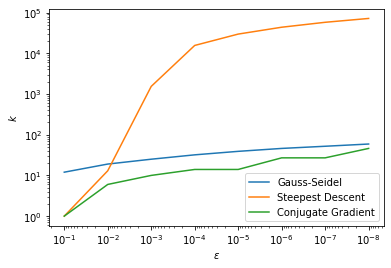

In [11]:
A = np.array([[  .2,   .1,   1.0,  1.0,    0.0],
              [  .1,  4.0, - 1.0,  1.0, -  1.0],
              [ 1.0, -1.0,  60.0,   .0,     .0],
              [ 1.0,  1.0,    .0,  8.0,    4.0],
              [  .0, -1.0, - 2.0,  4.0,  700.0]])
b = np.array( [ 1  ,  2  ,   3  ,  4  ,    5  ] )
x_exact = linalg.solve(A, b)

eps_list  = np.logspace(-8, -1, 8)

fig, ax = plt.subplots()

for alg, alg_name in [(GS, "Gauss-Seidel"), (SD, "Steepest Descent"), (CG, "Conjugate Gradient")]:
    k_list = []
    for eps in eps_list:
        x, k = alg(A, b, eps)
        k_list.append(k)
    ax.plot(eps_list, k_list, label=alg_name)
    
ax.set_xscale("log")
ax.invert_xaxis()
ax.set_yscale("log")
ax.set_xlabel("$\epsilon$")
ax.set_ylabel("$k$")
ax.legend()

fig.show()

In [12]:
print("The condition number for A is K(A) =", linalg.cond(A), ">> 1,")
print("so A is ill-conditioned, so the Conjugate Gradient method is highly susceptible to rounding errors.")
print("This explains the great difference in order of required iterations k as observed above.")

The condition number for A is K(A) = 12269.877667702964 >> 1,
so A is ill-conditioned, so the Conjugate Gradient method is highly susceptible to rounding errors.
This explains the great difference in order of required iterations k as observed above.


### Task 8

Try to get a better convergence behavior by pre-conditioning your matrix $A$. Instead of $A$ use

$$ \tilde{A} = C A C,$$

where $C = \sqrt{D^{-1}}$. If you do so, you will need to replace $\mathbf{b}$ by 

$$\mathbf{\tilde{b}} = C \mathbf{b}$$

and the vector $\mathbf{\tilde{x}}$ returned by your function will have to be transformed back via

$$\mathbf{x} = C \mathbf{\tilde{x}}.$$ 

What is the effect of $C$ on the condition number and why?

The number of iterations is brought down by a lot due to the conditioning, bringing down the runtime.


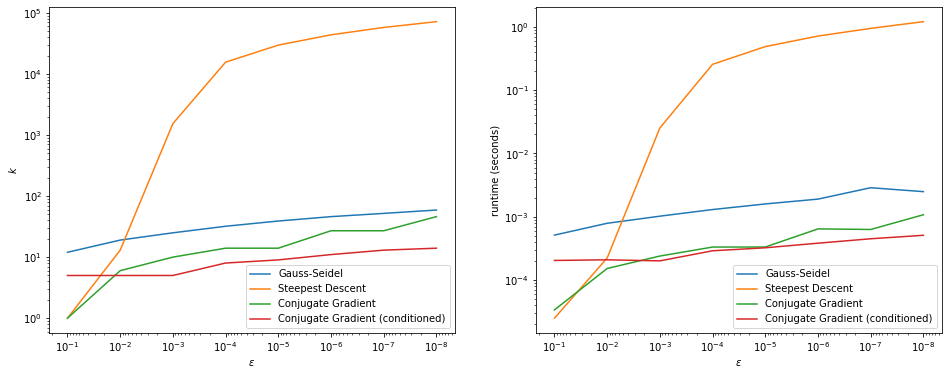

In [13]:
def CG_cond(A, b, eps, k_max = 1000000):
    """
    Return the Conjugate Gradient algorithm estimate solution x to the problem
    Ax = b, after diagonal conditioning A, and the number of iterations k it
    took to decrease maximum norm error below eps or to exceed iteration maximum
    k_max.
    """
    
    D = np.diag(np.diag(A))
    C = np.sqrt(linalg.inv(D))
    A_tilde = C @ A @ C
    b_tilde = C @ b
    
    x_tilde, k = CG(A_tilde, b_tilde, eps, k_max)
    x = C @ x_tilde
    return x, k

# Sorry for copying.

fig, ax = plt.subplots(1, 2, sharex = True, figsize = (16,6))

for alg, alg_name in [(GS, "Gauss-Seidel"), (SD, "Steepest Descent"), (CG, "Conjugate Gradient"), (CG_cond, "Conjugate Gradient (conditioned)")]:
    k_list = []
    t_list = []
    for eps in eps_list:
        t_start = time.time()
        x, k = alg(A, b, eps)
        t_list.append(time.time() - t_start)
        k_list.append(k)
    ax[0].plot(eps_list, k_list, label=alg_name)
    ax[1].plot(eps_list, t_list, label=alg_name)
    
ax[0].set_xscale("log")
ax[0].invert_xaxis()
ax[0].set_yscale("log")
ax[0].set_xlabel("$\epsilon$")
ax[0].set_ylabel("$k$")
ax[0].legend()

ax[1].set_yscale("log")
ax[1].set_xlabel("$\epsilon$")
ax[1].set_ylabel("runtime (seconds)")
ax[1].legend()

fig.show()

print("The number of iterations is brought down by a lot due to the conditioning, bringing down the runtime.")